### Importing the libraries

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [29]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

### Reading data

In [30]:
data = pd.read_csv('train_1.csv')

In [31]:
data.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [32]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB
None


### Checking null values with time

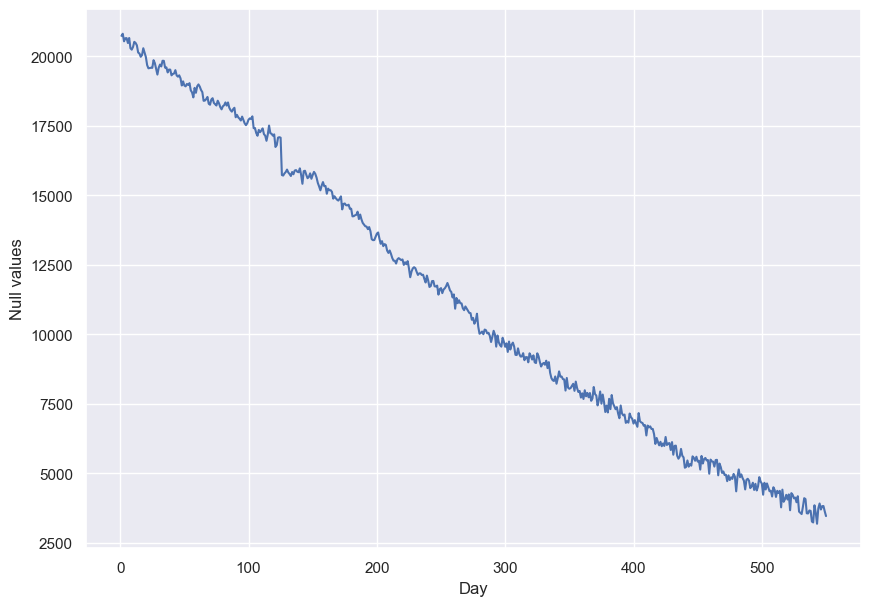

In [33]:

days = [r for r in range(1, len(data.columns))]
plt.figure(figsize=(10,7))
plt.xlabel('Day')
plt.ylabel('Null values')
plt.plot(days, data.isnull().sum()[1:])

It shows that null values decrease with time indicating that some pages didnt exist previously

In [34]:
data.shape

data=data.dropna(thresh=300)
data.shape

(133617, 551)

Dropping values where there isnt an entry for most days of the year and imputing rest with 0s


In [35]:
data=data.fillna(0)
data.tail()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
145012,Legión_(Marvel_Comics)_es.wikipedia.org_all-ac...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,3.0,2.0,4.0,2.0,4.0,4.0,1.0,2.0,2.0
145013,Referéndum_sobre_la_permanencia_del_Reino_Unid...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,16.0,8.0,3.0,6.0,3.0,3.0,10.0,11.0,3.0
145014,Salida_del_Reino_Unido_de_la_Unión_Europea_es....,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,29.0,36.0,23.0,182.0,43.0,8.0,22.0,13.0,18.0,14.0
145015,"Amar,_después_de_amar_es.wikipedia.org_all-acc...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,30.0,27.0,14.0,8.0,7.0,5.0,43.0,12.0,25.0
145016,Anexo:89.º_Premios_Óscar_es.wikipedia.org_all-...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [20]:
 !pip install prophet

## EDA


### Formatting page values to isolate page name,domain,access type and origin

#### Using regex

In [37]:
import re

def split_page(page):
    # Define the regex pattern to extract specific components
    pattern = r'(.+?)_([a-z]+)\.wikipedia\.org_([a-z-]+)_([a-z]+)'
    match = re.match(pattern, page)
    if match:
        specific_name = match.group(1)
        language = match.group(2)
        access_type = match.group(3)
        access_origin = match.group(4)
        return specific_name, language, access_type, access_origin
    else:
        
        return None, None, None, None

# Apply the function to the 'Page' column of your dataframe
extracted_data = data['Page'].map(split_page)

# Unzip the extracted components and assign them to new columns
data['Specific_Name'], data['Language'], data['Access_Type'], data['Access_Origin'] = zip(*extracted_data)


                                         Page  2015-07-01  2015-07-02  \
0     2NE1_zh.wikipedia.org_all-access_spider        18.0        11.0   
1      2PM_zh.wikipedia.org_all-access_spider        11.0        14.0   
2       3C_zh.wikipedia.org_all-access_spider         1.0         0.0   
3  4minute_zh.wikipedia.org_all-access_spider        35.0        13.0   
5     5566_zh.wikipedia.org_all-access_spider        12.0         7.0   

   2015-07-03  2015-07-04  2015-07-05  2015-07-06  2015-07-07  2015-07-08  \
0         5.0        13.0        14.0         9.0         9.0        22.0   
1        15.0        18.0        11.0        13.0        22.0        11.0   
2         1.0         1.0         0.0         4.0         0.0         3.0   
3        10.0        94.0         4.0        26.0        14.0         9.0   
5         4.0         5.0        20.0         8.0         5.0        17.0   

   2015-07-09  ...  2016-12-26  2016-12-27  2016-12-28  2016-12-29  \
0        26.0  ...        14

In [38]:
data.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,Specific_Name,Language,Access_Type,Access_Origin
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,14.0,20.0,22.0,19.0,18.0,20.0,2NE1,zh,all-access,spider
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,9.0,30.0,52.0,45.0,26.0,20.0,2PM,zh,all-access,spider
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,4.0,4.0,6.0,3.0,4.0,17.0,3C,zh,all-access,spider
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,16.0,11.0,17.0,19.0,10.0,11.0,4minute,zh,all-access,spider
5,5566_zh.wikipedia.org_all-access_spider,12.0,7.0,4.0,5.0,20.0,8.0,5.0,17.0,24.0,...,32.0,19.0,23.0,17.0,17.0,50.0,5566,zh,all-access,spider


In [39]:
data.groupby('Language').count()  

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,Specific_Name,Access_Type,Access_Origin
Language,,,,,,,,,,,,,,,,,,,,,
de,17362,17362,17362,17362,17362,17362,17362,17362,17362,17362,...,17362,17362,17362,17362,17362,17362,17362,17362,17362,17362
en,22486,22486,22486,22486,22486,22486,22486,22486,22486,22486,...,22486,22486,22486,22486,22486,22486,22486,22486,22486,22486
es,13551,13551,13551,13551,13551,13551,13551,13551,13551,13551,...,13551,13551,13551,13551,13551,13551,13551,13551,13551,13551
fr,16948,16948,16948,16948,16948,16948,16948,16948,16948,16948,...,16948,16948,16948,16948,16948,16948,16948,16948,16948,16948
ja,19295,19295,19295,19295,19295,19295,19295,19295,19295,19295,...,19295,19295,19295,19295,19295,19295,19295,19295,19295,19295
ru,14270,14270,14270,14270,14270,14270,14270,14270,14270,14270,...,14270,14270,14270,14270,14270,14270,14270,14270,14270,14270
zh,15211,15211,15211,15211,15211,15211,15211,15211,15211,15211,...,15211,15211,15211,15211,15211,15211,15211,15211,15211,15211


In [41]:
data['Language'].value_counts()

en    22486
ja    19295
de    17362
fr    16948
zh    15211
ru    14270
es    13551
Name: Language, dtype: int64

In [42]:
data.isnull().sum()

Page                 0
2015-07-01           0
2015-07-02           0
2015-07-03           0
2015-07-04           0
                 ...  
2016-12-31           0
Specific_Name    14494
Language         14494
Access_Type      14494
Access_Origin    14494
Length: 555, dtype: int64

In [46]:
# Group by 'Language' and compute the mean for each language
language_mean = data.groupby('Language').mean()

# Transpose the resulting DataFrame
language_mean_transposed = language_mean.T

# Display the transposed DataFrame
(language_mean_transposed)



Language,de,en,es,fr,ja,ru,zh
2015-07-01,763.765926,3767.328604,1127.485204,499.092872,614.637160,663.199229,272.498521
2015-07-02,753.362861,3755.158765,1077.485425,502.297852,705.813216,674.677015,272.906778
2015-07-03,723.074415,3565.225696,990.895949,483.007553,637.451671,625.329783,271.097167
2015-07-04,663.537323,3711.782932,930.303151,516.275785,800.897435,588.171829,273.712379
2015-07-05,771.358657,3833.433025,1011.759575,506.871666,768.352319,626.385354,291.977713
...,...,...,...,...,...,...,...
2016-12-27,1119.596936,6314.335275,1070.923400,840.590217,808.541436,998.374071,363.066991
2016-12-28,1062.284069,6108.874144,1108.996753,783.585379,807.430163,945.054730,369.049701
2016-12-29,1033.939062,6518.058525,1058.660320,763.209169,883.752786,909.352207,340.526330
2016-12-30,981.786430,5401.792360,807.551177,710.502773,979.278777,815.475123,342.745316


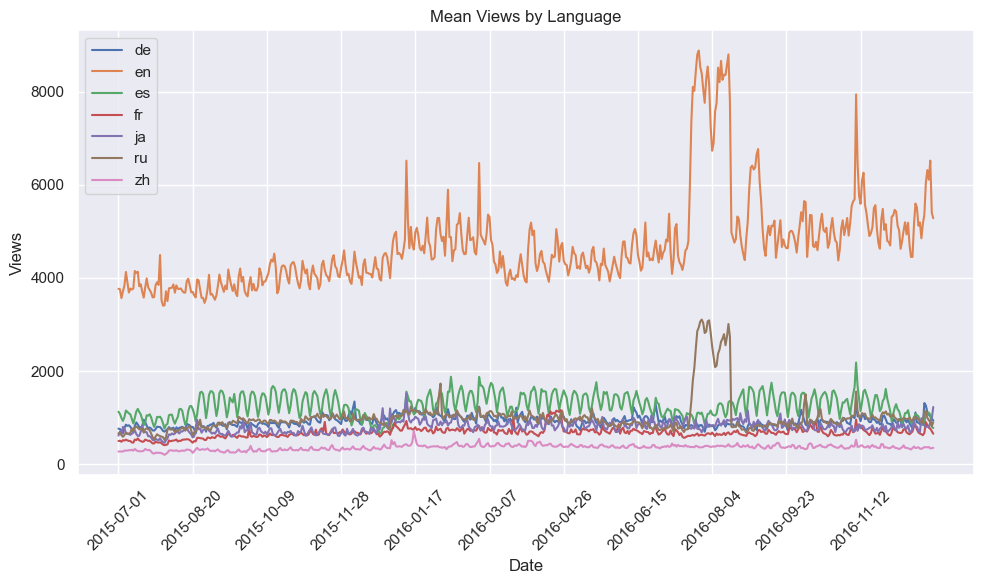

In [47]:

# Plotting
plt.figure(figsize=(10, 6))

# Plot each language's mean views
for language in language_mean_transposed.columns:
    plt.plot(language_mean_transposed.index, language_mean_transposed[language], label=language)

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Views')
plt.title('Mean Views by Language')
plt.legend()

# Set x-axis ticks at correct intervals
plt.xticks(language_mean_transposed.index[::50], rotation=45)

# Show plot
plt.tight_layout()
plt.show()


Clearly most views in english

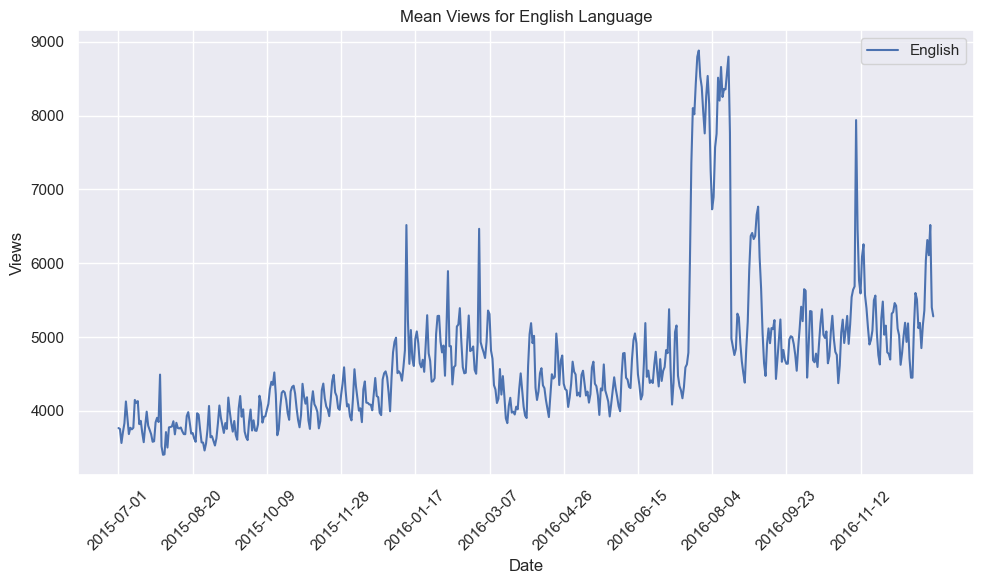

In [49]:
# Filter the mean views data for only English language
english_mean_views = language_mean_transposed['en']

# Plotting
plt.figure(figsize=(10, 6))

# Plot mean views for English language
plt.plot(english_mean_views.index, english_mean_views, label='English')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Views')
plt.title('Mean Views for English Language')
plt.legend()

# Set x-axis ticks at correct intervals
plt.xticks(english_mean_views.index[::50], rotation=45)

# Show plot
plt.tight_layout()
plt.show()



## Checking Stationarity using Dickey Fuller test

In [52]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(time_series):
    # Perform Dickey-Fuller test
    result = adfuller(time_series)
    
    # Extract test statistics and p-value
    test_statistic = result[0]
    p_value = result[1]
    
    # Define significance levels
    significance_levels = [0.01, 0.05, 0.1]
    
    # Print Dickey-Fuller test results
    print('Dickey-Fuller Test Results:')
    print(f'Test Statistic: {test_statistic}')
    print(f'p-value: {p_value}')
    
    # Interpretation of the test
    print('Results:')
    if p_value < significance_levels[0]:
        print("Reject the null hypothesis. Data is stationary.")
    elif p_value < significance_levels[1]:
        print("Fail to reject the null hypothesis. Data may be stationary.")
    elif p_value < significance_levels[2]:
        print("Fail to reject the null hypothesis. Data likely non-stationary.")
    else:
        print("Fail to reject the null hypothesis. Data is non-stationary.")

# Example usage:
check_stationarity(english_mean_views)


Dickey-Fuller Test Results:
Test Statistic: -2.3735629745699423
p-value: 0.1493374943735527
Results:
Fail to reject the null hypothesis. Data is non-stationary.


In [55]:
english_mean_views

2015-07-01    3767.328604
2015-07-02    3755.158765
2015-07-03    3565.225696
2015-07-04    3711.782932
2015-07-05    3833.433025
                 ...     
2016-12-27    6314.335275
2016-12-28    6108.874144
2016-12-29    6518.058525
2016-12-30    5401.792360
2016-12-31    5280.643467
Name: en, Length: 550, dtype: float64

In [56]:
english_mean_views_df = pd.DataFrame(english_mean_views, columns=['en'])


In [57]:
english_mean_views_df

,en
2015-07-01,3767.328604
2015-07-02,3755.158765
2015-07-03,3565.225696
2015-07-04,3711.782932
2015-07-05,3833.433025
...,...
2016-12-27,6314.335275
2016-12-28,6108.874144
2016-12-29,6518.058525
2016-12-30,5401.792360


In [58]:
english_mean_views_df = english_mean_views_df.rename_axis('Language_Index')


In [59]:
english_mean_views_df

,en
Language_Index,
2015-07-01,3767.328604
2015-07-02,3755.158765
2015-07-03,3565.225696
2015-07-04,3711.782932
2015-07-05,3833.433025
...,...
2016-12-27,6314.335275
2016-12-28,6108.874144
2016-12-29,6518.058525


### Making it stationary using Decomposition

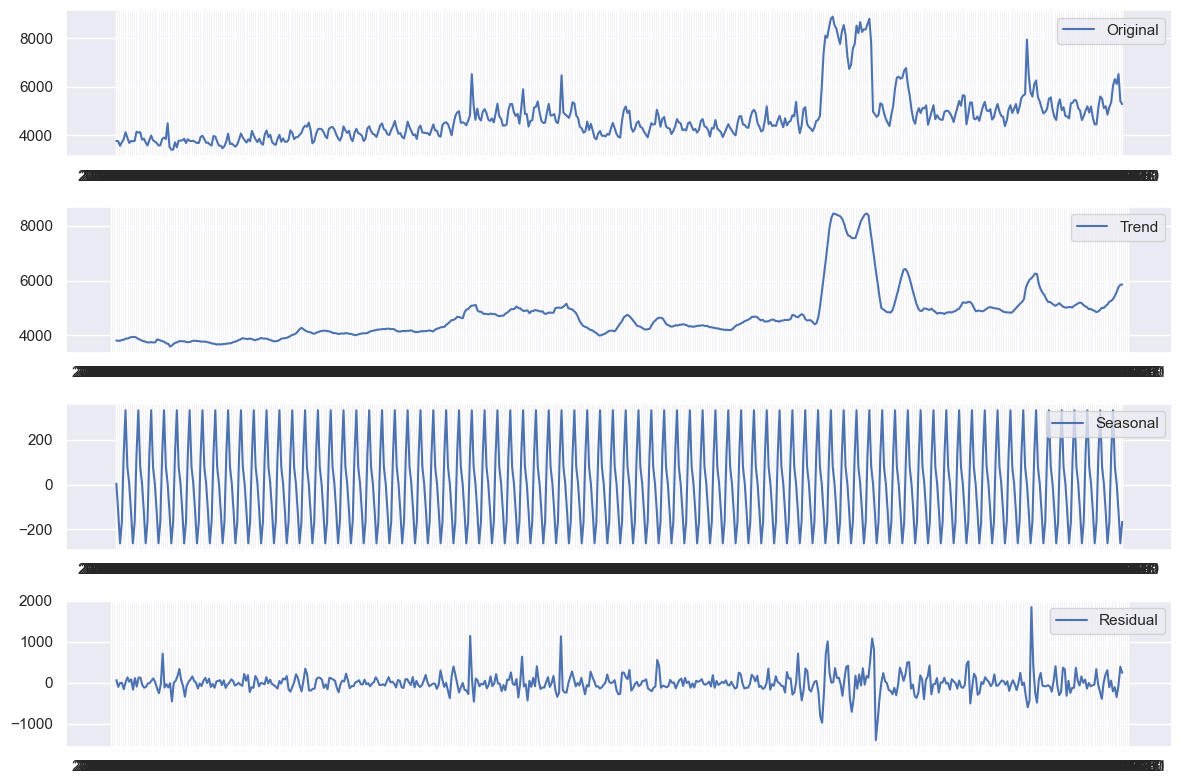

In [60]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(english_mean_views_df['en'], period=7)

# Plot original, trend, seasonal, and residual components
plt.figure(figsize=(12, 8))

# Original
plt.subplot(411)
plt.plot(english_mean_views_df.index, decomposition.observed, label='Original')
plt.legend()

# Trend
plt.subplot(412)
plt.plot(english_mean_views_df.index, decomposition.trend, label='Trend')
plt.legend()

# Seasonal
plt.subplot(413)
plt.plot(english_mean_views_df.index, decomposition.seasonal, label='Seasonal')
plt.legend()

# Residual
plt.subplot(414)
plt.plot(english_mean_views_df.index, decomposition.resid, label='Residual')
plt.legend()

plt.tight_layout()
plt.show()


In [61]:
# Check for stationarity in the residual component using Dickey-Fuller test
check_stationarity(decomposition.resid.dropna())


Dickey-Fuller Test Results:
Test Statistic: -11.437315717171515
p-value: 6.3015228361645774e-21
Results:
Reject the null hypothesis. Data is stationary.


### Removing trend and seasonality with differencing

In [62]:
# Perform differencing to remove trend
english_mean_views_stationary = english_mean_views_df['en'].diff().dropna()


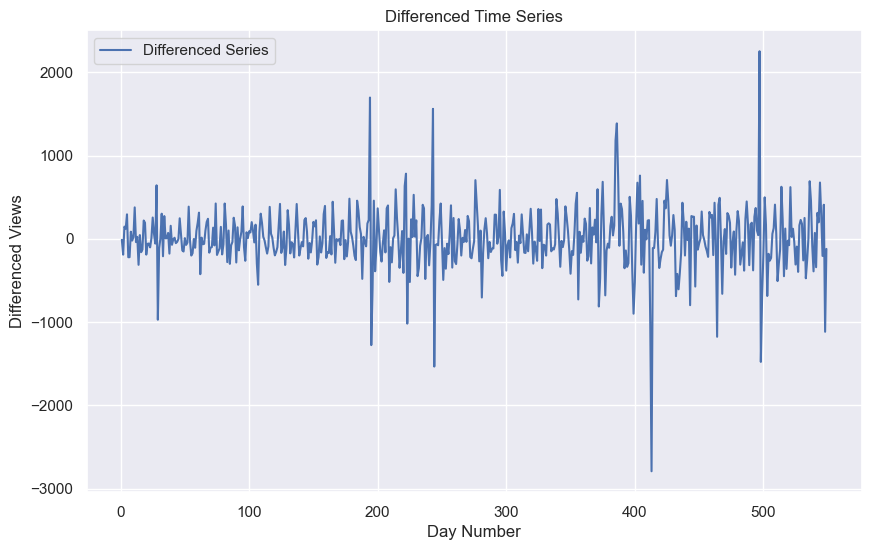

In [64]:
# Create a sequence of day numbers
day_numbers = range(1, len(english_mean_views_stationary) + 1)

# Plot the differenced time series
plt.figure(figsize=(10, 6))
plt.plot(day_numbers, english_mean_views_stationary, label='Differenced Series')
plt.xlabel('Day Number')
plt.ylabel('Differenced Views')
plt.title('Differenced Time Series')
plt.legend()
plt.show()



In [65]:
# Check for stationarity using Dickey-Fuller test
check_stationarity(english_mean_views_stationary)


Dickey-Fuller Test Results:
Test Statistic: -8.273590058493825
p-value: 4.721271966433437e-13
Results:
Reject the null hypothesis. Data is stationary.


### Plotting the autocorreltaion and partial auto correlation functions

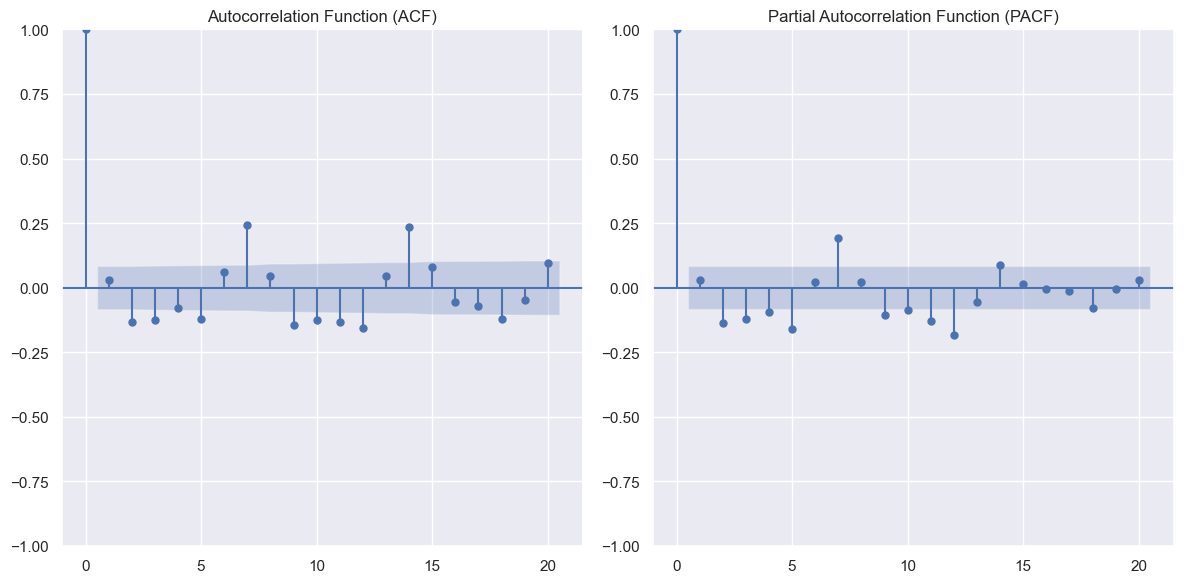

In [67]:
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create a figure and axes with a specific size
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot autocorrelation function (ACF)
plot_acf(english_mean_views_stationary, lags=20, ax=axs[0])
axs[0].set_title('Autocorrelation Function (ACF)')

# Plot partial autocorrelation function (PACF)
plot_pacf(english_mean_views_stationary, lags=20, ax=axs[1])
axs[1].set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


## Using ARIMA model

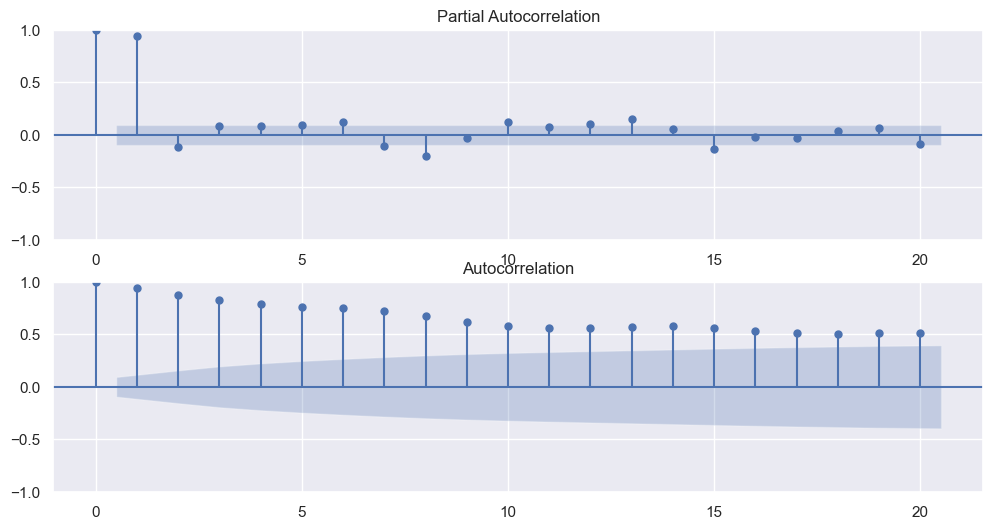

C:\Users\Sharat\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Sharat\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


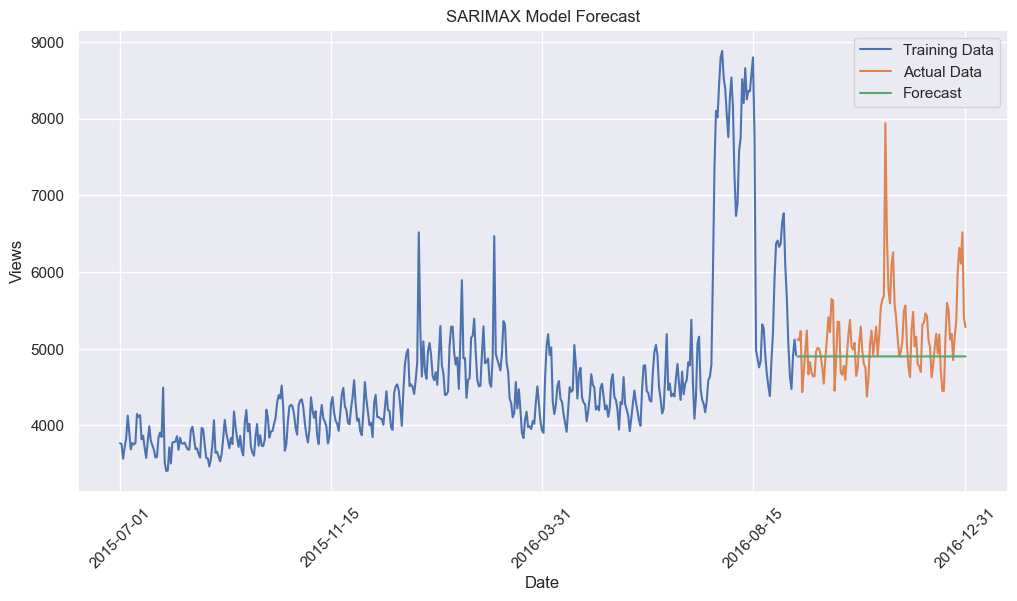

In [76]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot PACF and ACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_pacf(train_data, ax=plt.gca(), lags=20)
plt.subplot(212)
plot_acf(train_data, ax=plt.gca(), lags=20)
plt.show()

# Determine AR and MA orders based on cut-off points
p = 1  # AR order
q = 1  # MA order
d = 1  # Differencing order

# Fit SARIMAX model
sarimax_model = SARIMAX(train_data, order=(p, d, q), seasonal_order=(0, 0, 0, 0))  # We're not considering seasonality here
sarimax_result = sarimax_model.fit()

# Make predictions
predictions = sarimax_result.predict(start=test_data.index[0], end=test_data.index[-1], dynamic=False)

import numpy as np

# Combine training and testing indices
all_indices = np.concatenate((train_data.index, test_data.index))

# Plot training, actual, and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Actual Data')
plt.plot(test_data.index, predictions, label='Forecast')
plt.xlabel('Date')
plt.ylabel('Views')
plt.title('SARIMAX Model Forecast')
plt.legend()

# Selecting dates to display on the x-axis
n = 5  # Number of dates to display
x_ticks_indices = np.linspace(0, len(all_indices) - 1, n).astype(int)
selected_dates = all_indices[x_ticks_indices]

# Set x-axis ticks at selected dates
plt.xticks(selected_dates, rotation=45)

plt.show()




## Using SARIMAX with exog values

In [77]:
ex_df = pd.read_csv('Exog_Campaign_eng.csv')
ex_df.head()

,Exog
0,0
1,0
2,0
3,0
4,0


In [84]:
from pandas import DataFrame

In [85]:
exog=ex_df['Exog'].to_numpy()

C:\Users\Sharat\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Sharat\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


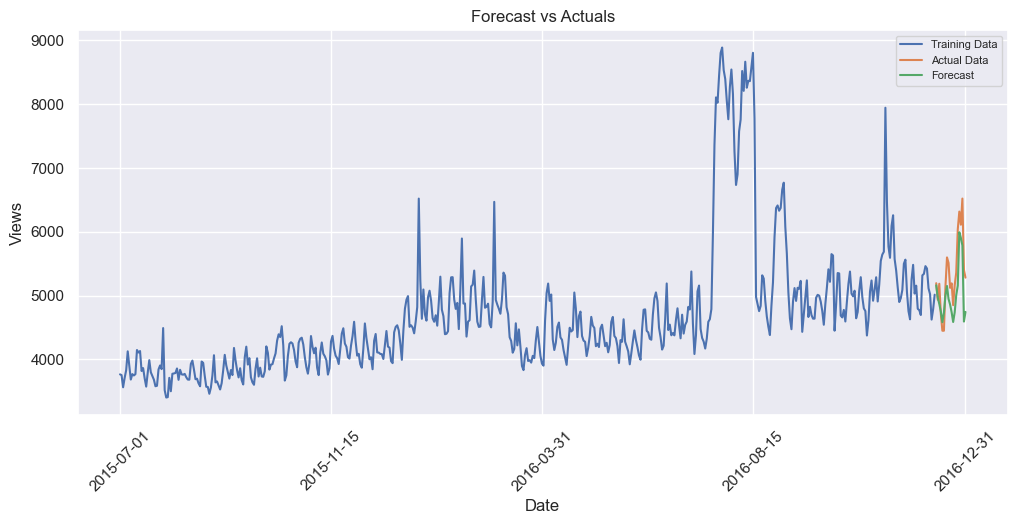

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

# Define train and test data
train = english_mean_views_df.iloc[:530]
test = english_mean_views_df.iloc[530:]

# Fit SARIMAX model with exogenous variables
model = sm.tsa.statespace.SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7), exog=exog[:530])
results = model.fit()

# Make forecast
forecast = results.forecast(20, dynamic=True, exog=pd.DataFrame(exog[530:]))

# Convert forecast to pandas series
fc_series = pd.Series(forecast, index=test.index)

# Plot
plt.figure(figsize=(12, 5))
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Data')
plt.plot(fc_series, label='Forecast')
plt.title('Forecast vs Actuals')
plt.xlabel('Date')
plt.ylabel('Views')
plt.legend(fontsize=8)

# Selecting well-spaced dates to display on the x-axis
n = 5  # Number of dates to display
x_ticks_indices = np.linspace(0, len(english_mean_views_df) - 1, n).astype(int)
selected_dates = english_mean_views_df.index[x_ticks_indices]

# Set x-axis ticks at selected dates
plt.xticks(selected_dates, rotation=45)

plt.show()



In [140]:
forecast_values = forecast22.values.ravel()
test_values = test22.values.ravel()

# Calculate MAPE
mape22 = np.mean(np.abs(forecast_values - test_values) / np.abs(test_values))
print("MAPE:", mape22)

MAPE: 0.04661381079443559


#### We see that we get best result from SARIMAX with MAPE of 0.0466

## Using Facebook Prophet without exogenous values

01:23:50 - cmdstanpy - INFO - Chain [1] start processing
01:23:52 - cmdstanpy - INFO - Chain [1] done processing


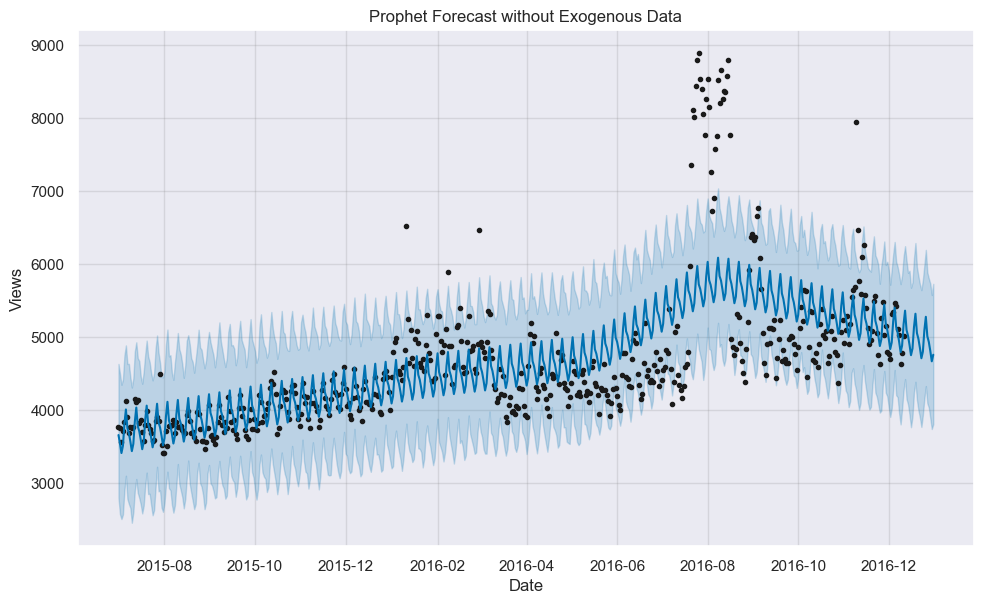

In [89]:
# Make a copy of english_mean_views_df
df_copy = english_mean_views_df.copy()

# Reset index and rename column
df_copy.reset_index(inplace=True)
df_copy.rename(columns={'Language_Index': 'ds', 'en': 'y'}, inplace=True)

# Split into train and test sets
train_size = 530
train_df = df_copy.iloc[:train_size]
test_df = df_copy.iloc[train_size:]

# Create Prophet model without exogenous data
prophet_model = Prophet()
prophet_model.fit(train_df)

# Make forecast
future = prophet_model.make_future_dataframe(periods=len(test_df))
forecast = prophet_model.predict(future)

# Plot forecast without exogenous data
fig = prophet_model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Views')
plt.title('Prophet Forecast without Exogenous Data')
plt.show()


In [111]:
exog

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Using Facebook Prophet with exogenous values

21:47:08 - cmdstanpy - INFO - Chain [1] start processing
21:47:09 - cmdstanpy - INFO - Chain [1] done processing


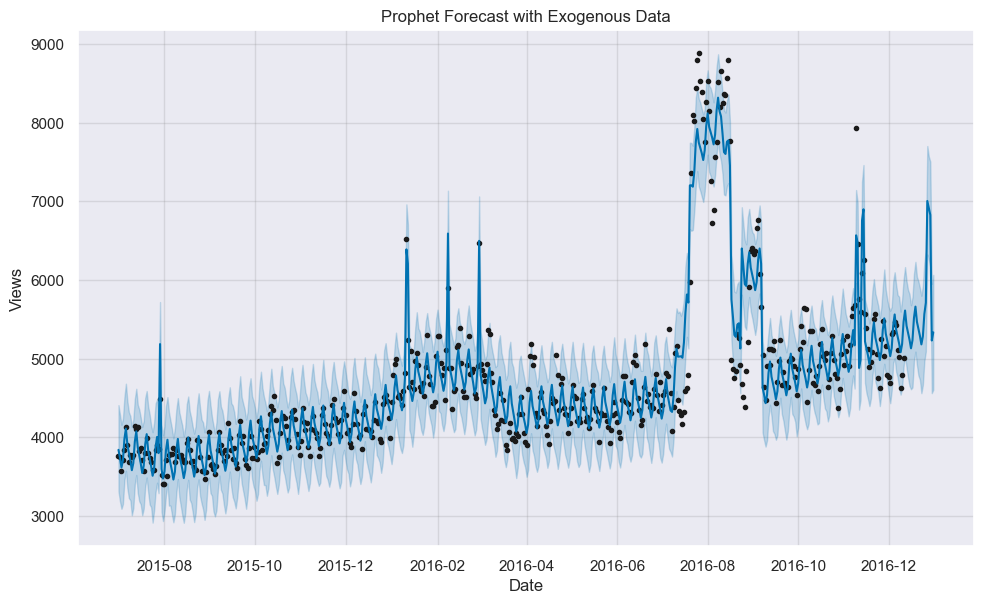

In [116]:

# Make a copy of english_mean_views_df
df_copy = english_mean_views_df.reset_index().copy()

# Rename columns to "ds" and "y"
df_copy.rename(columns={'Language_Index': 'ds', 'en': 'y'}, inplace=True)

# Initialize Prophet Model
model = Prophet(interval_width=0.9, weekly_seasonality=True, changepoint_prior_scale=1)

# Convert exog array to DataFrame
exog_df = pd.DataFrame({'ds': df_copy['ds'], 'exog': exog})

# Add Exogenous Regressor
model.add_regressor('exog')

# Fit the Model (excluding last 20 rows)
model.fit(df_copy[:-20].merge(exog_df[:-20], on='ds'))

# Make Forecast (including last 20 rows)
forecast = model.predict(df_copy.merge(exog_df, on='ds'))

# Plot the Forecast
fig = model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Views')
plt.title('Prophet Forecast with Exogenous Data')
plt.show()



#### Poltting actual vs predicted

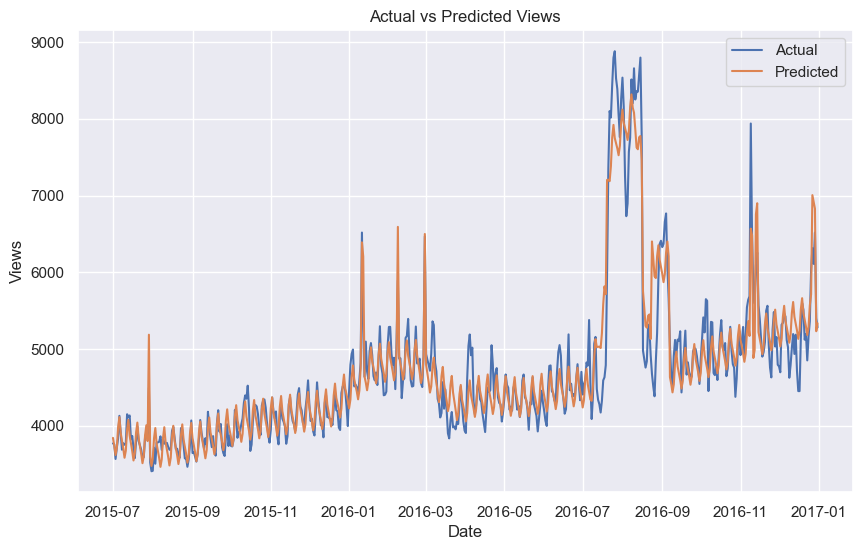

In [118]:


# Convert datetime column to datetime objects
df_copy['ds'] = pd.to_datetime(df_copy['ds'])

# Plot the Forecast and Actual Values
plt.figure(figsize=(10, 6))
plt.plot(df_copy['ds'], df_copy['y'], label='Actual')
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('Views')
plt.title('Actual vs Predicted Views')
plt.legend()
plt.show()



In [122]:
def calculate_mape(actual, predicted):
    # Calculate absolute percentage error
    abs_percentage_error = np.abs((actual - predicted) / actual)
    
    # Calculate mean absolute percentage error
    mape = np.mean(abs_percentage_error) 
    
    return mape

# Calculate MAPE
mape = calculate_mape(english_mean_views_df['en'].values[-20:], forecast['yhat'].values[-20:])
print("MAPE:", mape)


MAPE: 0.0663021464072997


## Creating gridsearch function to find best model for each language

In [106]:


def grid_search(ts):
    p_values = range(4)  # Values of p to try
    d_values = range(4)  # Values of d to try
    q_values = range(4)  # Values of q to try
    
    best_mape = 100  # Initialize the best MAPE score
    best_params = [0, 0, 0]  # Initialize the best parameters (p, d, q)
    
    # Perform grid search
    for p in p_values:
        for d in d_values:
            for q in q_values:
                try:
                    # Fit SARIMAX model
                    model = SARIMAX(ts[:-20], order=(p, d, q))
                    model_fit = model.fit(disp=-1)
                    
                    # Make forecast
                    fc = model_fit.forecast(20, alpha=0.02)
                    
                    # Calculate MAPE
                    mape = np.mean(np.abs(fc.values - ts[-20:].values) / np.abs(ts[-20:].values))
                    
                    # Update best MAPE and parameters if current model is better
                    if mape < best_mape:
                        best_mape = mape
                        best_params = [p, d, q]
                        
                except:
                    pass  # Skip if model fitting fails
                
    return best_mape, best_params


In [125]:

def all_arima(train, test, val):
    # Fit SARIMAX model
    model = SARIMAX(train, order=(val[0], val[1], val[2]))  
    fitted = model.fit(disp=-1)  

    # Forecast
    fc = fitted.forecast(20, alpha=0.02)  

    # Convert forecast to pandas series
    fc_series = pd.Series(fc, index=test.index)

    # Plot
    plt.figure(figsize=(12,5), dpi=100)
    plt.plot(train, label='Training')
    plt.plot(test, label='Actual')
    plt.plot(fc_series, label='Forecast')
    plt.title('Forecast vs Actuals')
    plt.xlabel('Date')
    plt.ylabel('Views')
    plt.legend(loc='upper left', fontsize=8)
    plt.show()
    
    # Calculate MAPE and RMSE
    mape = np.mean(np.abs(fc - test) / np.abs(test))
    rmse = np.sqrt(np.mean((fc - test) ** 2))
    
    
    return fc,rmse



In [109]:
import warnings
warnings.filterwarnings("ignore")

In [129]:
test.isnull().sum()

0

language:  de
[3, 2, 3]


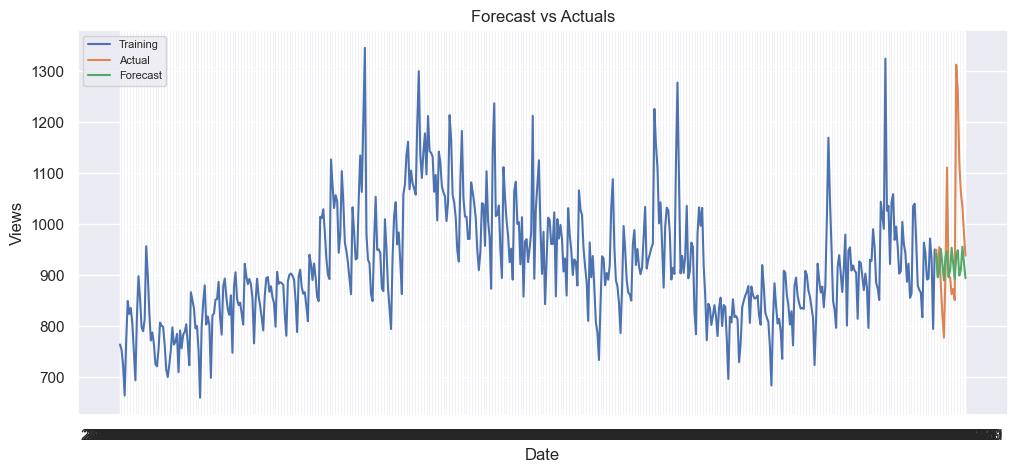

MAPE: 0.09353358690088856
language:  en
[1, 1, 1]


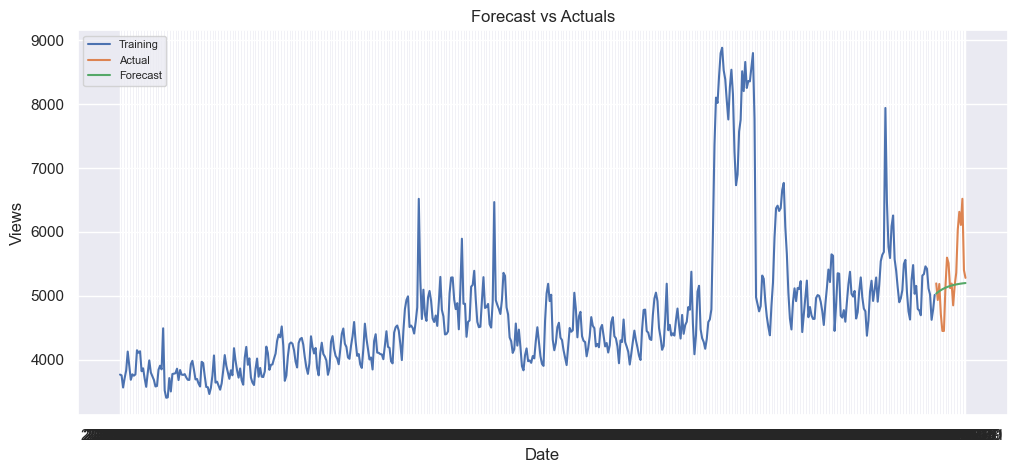

MAPE: 0.07223427767239152
language:  es
[3, 2, 3]


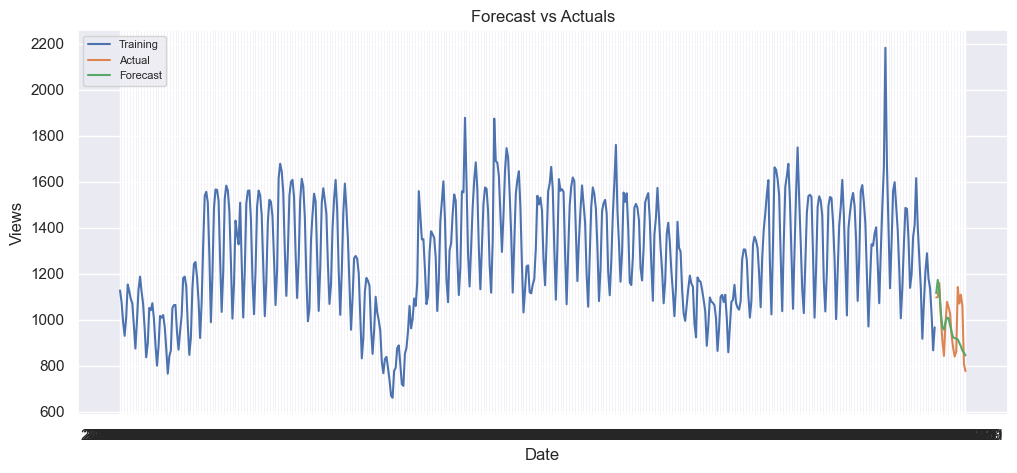

MAPE: 0.08062441451185409
language:  fr
[3, 0, 1]


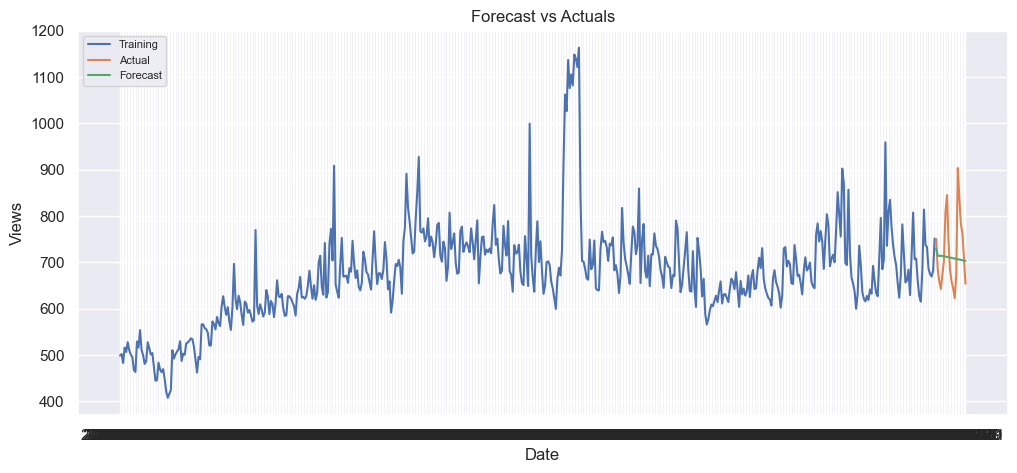

MAPE: 0.0854842610901467
language:  ja
[2, 1, 2]


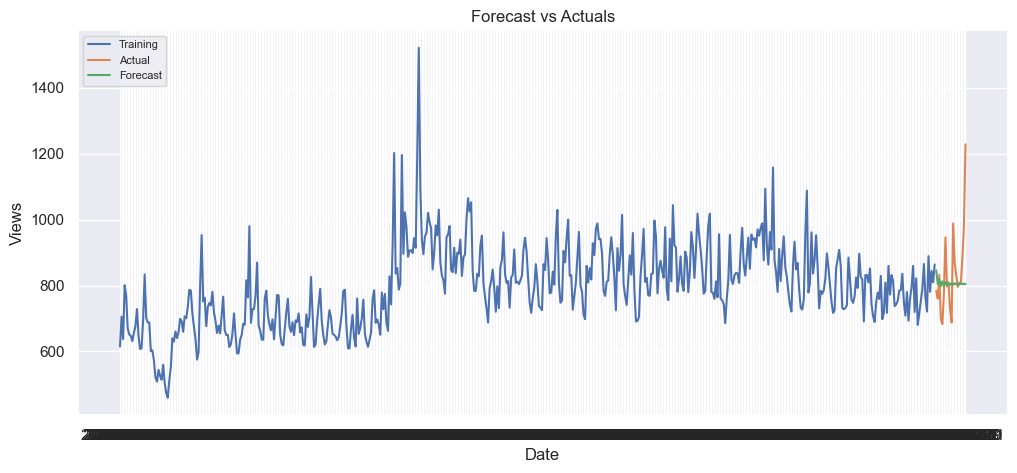

MAPE: 0.09361914222146142
language:  ru
[3, 3, 2]


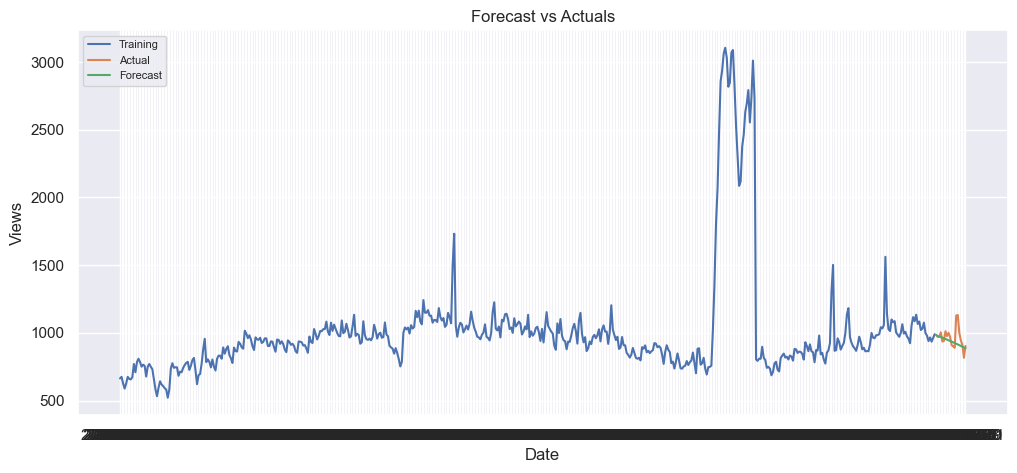

MAPE: 0.05011008837152442
language:  zh
[3, 0, 3]


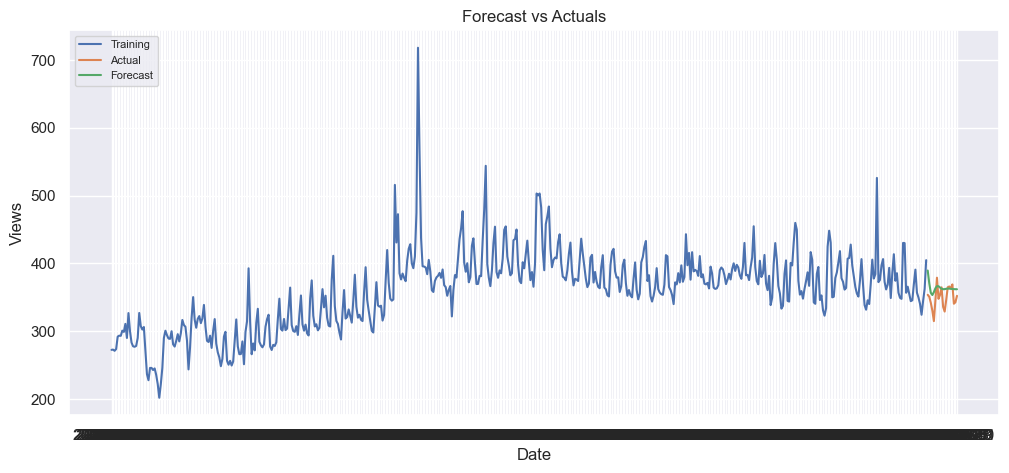

MAPE: 0.04917926933904462


In [141]:
views_prediction={}
for c in language_mean_transposed:
    print("language: ",c)
    kk=(language_mean_transposed[c])
    mape,val=grid_search(kk)
    print(val)
    train = kk[:530]
    test = kk[530:]
    fc,rmse=all_arima(train,test,val)
    views_prediction[c]=fc
    print("MAPE:", mape)
    

### Inferences
* English language pages are most viewed
* There are some formatting errors that give www and commons as languages
* Traffic increased and null values decreased with time
* Access type usage of mobile and desktop is similar
* There are certain spikes which are not outliers but event days
* Data is not stationary
* there is a weekly seasonality
* SARIMAX model gives best MAPE of 0.0466
* FB Prophet gave MAPE of 0.066

### Recommendations
* Content Optimization: Since English language pages are the most viewed, allocate resources to optimize and enhance the quality of English-language content. Focus on creating compelling, relevant, and engaging content to maintain and further increase viewership.

* Language Identification: Address the formatting errors that incorrectly categorize URLs as languages (e.g., "www" and "commons"). Implement robust language identification algorithms to accurately classify content and avoid misinterpretations.

* Traffic Monitoring and Analysis: Continue monitoring traffic patterns over time and analyze trends to identify areas of growth and potential opportunities. Invest resources in content areas that show consistent increases in traffic and address any remaining null values to ensure data integrity.

* Mobile Optimization: Since access type usage of mobile and desktop is similar, prioritize mobile optimization strategies to cater to the growing number of users accessing content via mobile devices. Ensure that the website and content are responsive, load quickly, and provide a seamless user experience across all devices.

* Event Day Preparedness: Identify and anticipate event days that result in traffic spikes. Develop content and promotional strategies to capitalize on these spikes and maximize engagement with the audience during such events.

* Time-Series Analysis: Recognize the presence of non-stationarity and weekly seasonality in the data. Implement time-series analysis techniques, such as SARIMAX modeling, to forecast future traffic patterns accurately. Use these insights to plan content releases, promotional activities, and resource allocation effectively.

* Continuous Improvement: Emphasize a culture of continuous improvement and data-driven decision-making. Regularly review and refine content strategies, SEO techniques, and user engagement initiatives based on performance metrics and feedback from users.

* Localization and Global Reach: Explore opportunities to expand content localization efforts beyond English to cater to diverse language preferences and global audiences. Tailor content to meet the specific needs and preferences of different language-speaking communities to foster engagement and loyalty.

* Collaboration and Partnerships: Collaborate with relevant stakeholders, influencers, and communities to amplify reach and engagement. Form partnerships with local organizations or content creators to co-create content and leverage each other's networks for mutual benefit.